In [1]:
# LSTM - btc

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
! python -V

Python 3.7.6


In [4]:
! pip list

Package                            Version            
---------------------------------- -------------------
absl-py                            0.9.0              
alabaster                          0.7.12             
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.12             
anaconda-project                   0.8.3              
argh                               0.26.2             
asn1crypto                         1.3.0              
astor                              0.8.0              
astroid                            2.3.3              
astropy                            4.0                
atomicwrites                       1.3.0              
attrs                              19.3.0             
autopep8                           1.4.4              
Babel                              2.8.0              
backcall                           0.1.0              
backports.functools-lru-cache      1.6.1              
backports.

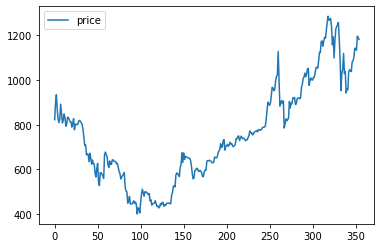

In [7]:
# Importing the dataset
ts = pd.read_csv('btc.csv')
ts.plot()

In [8]:
# Feature Scaling
ts['y'] = ts[['price']].pct_change()

In [10]:
# Creating lagged dataset
ts['x'] = ts[['y']].shift(1)
ts.columns = ['price','y','x']

In [11]:
# Splitting the dataset into the Training set and Test set
train_size = int(len(ts[['y']]) * 0.7)
train, test = ts[2:train_size], ts[train_size:]
train_X, train_y = train[['x']].to_numpy(), train[['y']].to_numpy()
test_X, test_y = test[['x']].to_numpy(), test[['y']].to_numpy()

In [12]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

Using TensorFlow backend.
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [13]:
#np.random.get_state()[1][0]
np.random.seed(2147483648)

# Creating model
batch_size = 2
nb_epoch = 1000
neurons = 5

X, y = train_X, train_y
X = X.reshape(X.shape[0], 1, X.shape[1])

lstm = Sequential()
lstm.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
lstm.add(Dense(1))

# Compiling
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Fitting
for i in range(nb_epoch):
    lstm.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    lstm.reset_states()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


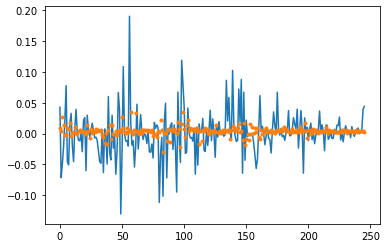

In [14]:
# Predicting scaled training set
yhat = lstm.predict(X, batch_size=batch_size)

from matplotlib import pyplot
pyplot.plot(y)
pyplot.plot(yhat, '.')
pyplot.show()

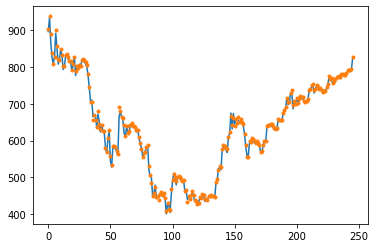

In [15]:
# Inversing scaling
tshat = pd.DataFrame(yhat, columns=['yhat']) 
tshat['history'] = ts['price'][1:247].reset_index()['price']
tshat['pricehat'] = tshat['yhat']*tshat['history'] + tshat['history']

# Plotting
pyplot.plot(tshat['history'])
pyplot.plot(tshat['pricehat'], '.')
pyplot.show()

In [45]:
# Reporting performance
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(tshat['yhat'], tshat['history']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 649.040


In [46]:
# Predicting scaled test set
X1, y1 = test_X, test_y
X1 = X1.reshape(X1.shape[0], 1, X1.shape[1])
yhat1 = lstm.predict(X1, batch_size=batch_size)
from matplotlib import pyplot
pyplot.plot(y1)
pyplot.plot(yhat1, '.')
pyplot.show()

ValueError: could not broadcast input array from shape (2,1) into shape (1,1)

In [47]:
X1

array([[[ 0.0441399 ]],

       [[ 0.04731393]],

       [[-0.01076826]],

       [[-0.00528507]],

       [[ 0.0117657 ]],

       [[ 0.03682082]],

       [[ 0.03988105]],

       [[-0.00423652]],

       [[-0.01165192]],

       [[ 0.00811159]],

       [[ 0.03943202]],

       [[ 0.01828876]],

       [[ 0.00705209]],

       [[ 0.10127771]],

       [[-0.11722822]],

       [[-0.11217304]],

       [[ 0.01554888]],

       [[ 0.01262074]],

       [[-0.0153816 ]],

       [[ 0.01328218]],

       [[-0.13336157]],

       [[ 0.0231127 ]],

       [[ 0.02853383]],

       [[-0.01014502]],

       [[ 0.00525083]],

       [[ 0.01009176]],

       [[ 0.08830846]],

       [[-0.03192003]],

       [[ 0.02377604]],

       [[-0.00243111]],

       [[ 0.03002034]],

       [[-0.00200367]],

       [[ 0.00377746]],

       [[-0.03443693]],

       [[ 0.00306115]],

       [[ 0.02565448]],

       [[ 0.00362845]],

       [[ 0.00112316]],

       [[-0.00475844]],

       [[ 0.00572785]],



In [ ]:
# Inversing scaling
tshat1 = pd.DataFrame(yhat1, columns=['yhat']) 
from sklearn.preprocessing import MinMaxScaler
tshat['dfhat'] = sc.inverse_transform(tshat1)

# Adding trend
tshat1['history'] = ts['price'][1:247].reset_index()['price']
tshat1['yhat'] = tshat1['dfhat'] + tshat1['history']

# Plotting
pyplot.plot(tshat1['history'])
pyplot.plot(tshat1['yhat'], '.')
pyplot.show()

In [ ]:
# Reporting performance
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(tshat1['yhat'], tshat1['history']))
print('Test RMSE: %.3f' % rmse)